# <center>ElecTweets</center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-des-Librairies" data-toc-modified-id="Import-des-Librairies-1">Import des Librairies</a></span></li><li><span><a href="#Import-du-Dataset" data-toc-modified-id="Import-du-Dataset-2">Import du Dataset</a></span></li><li><span><a href="#Exploration-et-Analyse-du-Dataset" data-toc-modified-id="Exploration-et-Analyse-du-Dataset-3">Exploration et Analyse du Dataset</a></span><ul class="toc-item"><li><span><a href="#Analyse-des-valeurs-manquantes" data-toc-modified-id="Analyse-des-valeurs-manquantes-3.1">Analyse des valeurs manquantes</a></span></li></ul></li><li><span><a href="#Préparation-du-Dataset" data-toc-modified-id="Préparation-du-Dataset-4">Préparation du Dataset</a></span><ul class="toc-item"><li><span><a href="#Suppression-des-observations-sans-valeur-cible" data-toc-modified-id="Suppression-des-observations-sans-valeur-cible-4.1">Suppression des observations sans valeur cible</a></span></li><li><span><a href="#Suppression-des-candidats-sans-compte-Twitter" data-toc-modified-id="Suppression-des-candidats-sans-compte-Twitter-4.2">Suppression des candidats sans compte Twitter</a></span></li><li><span><a href="#Suppression-des-variables-non-pertinentes" data-toc-modified-id="Suppression-des-variables-non-pertinentes-4.3">Suppression des variables non pertinentes</a></span></li><li><span><a href="#Séparation-de-la-colonne-cible" data-toc-modified-id="Séparation-de-la-colonne-cible-4.4">Séparation de la colonne cible</a></span></li><li><span><a href="#Constitution-des-jeux-d'entraînement-et-de-test" data-toc-modified-id="Constitution-des-jeux-d'entraînement-et-de-test-4.5">Constitution des jeux d'entraînement et de test</a></span></li><li><span><a href="#Traitement-des-valeurs-manquantes" data-toc-modified-id="Traitement-des-valeurs-manquantes-4.6">Traitement des valeurs manquantes</a></span></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-4.7">Feature engineering</a></span></li><li><span><a href="#Création-du-preprocessor" data-toc-modified-id="Création-du-preprocessor-4.8">Création du preprocessor</a></span></li></ul></li><li><span><a href="#Modélisation" data-toc-modified-id="Modélisation-5">Modélisation</a></span><ul class="toc-item"><li><span><a href="#Définition-des-métriques" data-toc-modified-id="Définition-des-métriques-5.1">Définition des métriques</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-5.2">Decision Tree</a></span></li></ul></li></ul></div>

## Import des Librairies

In [17]:
import warnings
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

/Users/antoine/Dev/miniconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Import du Dataset

In [85]:
dates = [
    "date_naissance",
    "date_creation_compte",
    "date_premier_tour"
]

df = pd.read_csv('data/dataframe_to_use.csv', sep=";", parse_dates=dates)

## Exploration et Analyse du Dataset

In [88]:
df.head()

,id_candidat,prenom,nom,sexe,date_naissance,id_twitter,compte_verifie,date_creation_compte,annee_election,date_premier_tour,...,avg_retweets_last_week,sum_retweets_1st_concern,max_retweets_1st_concern,avg_retweets_1st_concern,sum_retweets_2nd_concern,max_retweets_2nd_concern,avg_retweets_2nd_concern,sum_retweets_3rd_concern,max_retweets_3rd_concern,avg_retweets_3rd_concern
0,1,Sandrine,Adobati,F,1974-03-30,NaN,NaN,NaT,2022,2022-06-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Marie-Josee,Boulaire,F,1959-01-26,1.130170e+18,False,2019-05-01,2022,2022-06-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Arnaud,Charvillat,M,1977-10-28,NaN,NaN,NaT,2022,2022-06-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,François-Marie,Didier,M,1980-10-03,1.207402e+18,False,2019-12-01,2022,2022-06-12,...,93.0,27.0,27.0,27.0,NaN,NaN,NaN,0.0,0.0,0.0
4,5,Lamia,El Aaraje,F,1986-11-22,9.436728e+08,True,2012-11-01,2022,2022-06-12,...,36.0,15.0,15.0,15.0,73.0,43.0,37.0,NaN,NaN,NaN


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 58 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id_candidat                      45 non-null     int64         
 1   prenom                           45 non-null     object        
 2   nom                              45 non-null     object        
 3   sexe                             45 non-null     object        
 4   date_naissance                   44 non-null     datetime64[ns]
 5   id_twitter                       30 non-null     float64       
 6   compte_verifie                   30 non-null     object        
 7   date_creation_compte             30 non-null     datetime64[ns]
 8   annee_election                   45 non-null     int64         
 9   date_premier_tour                45 non-null     datetime64[ns]
 10  nom_annee_election               45 non-null     object        


### Analyse des valeurs manquantes

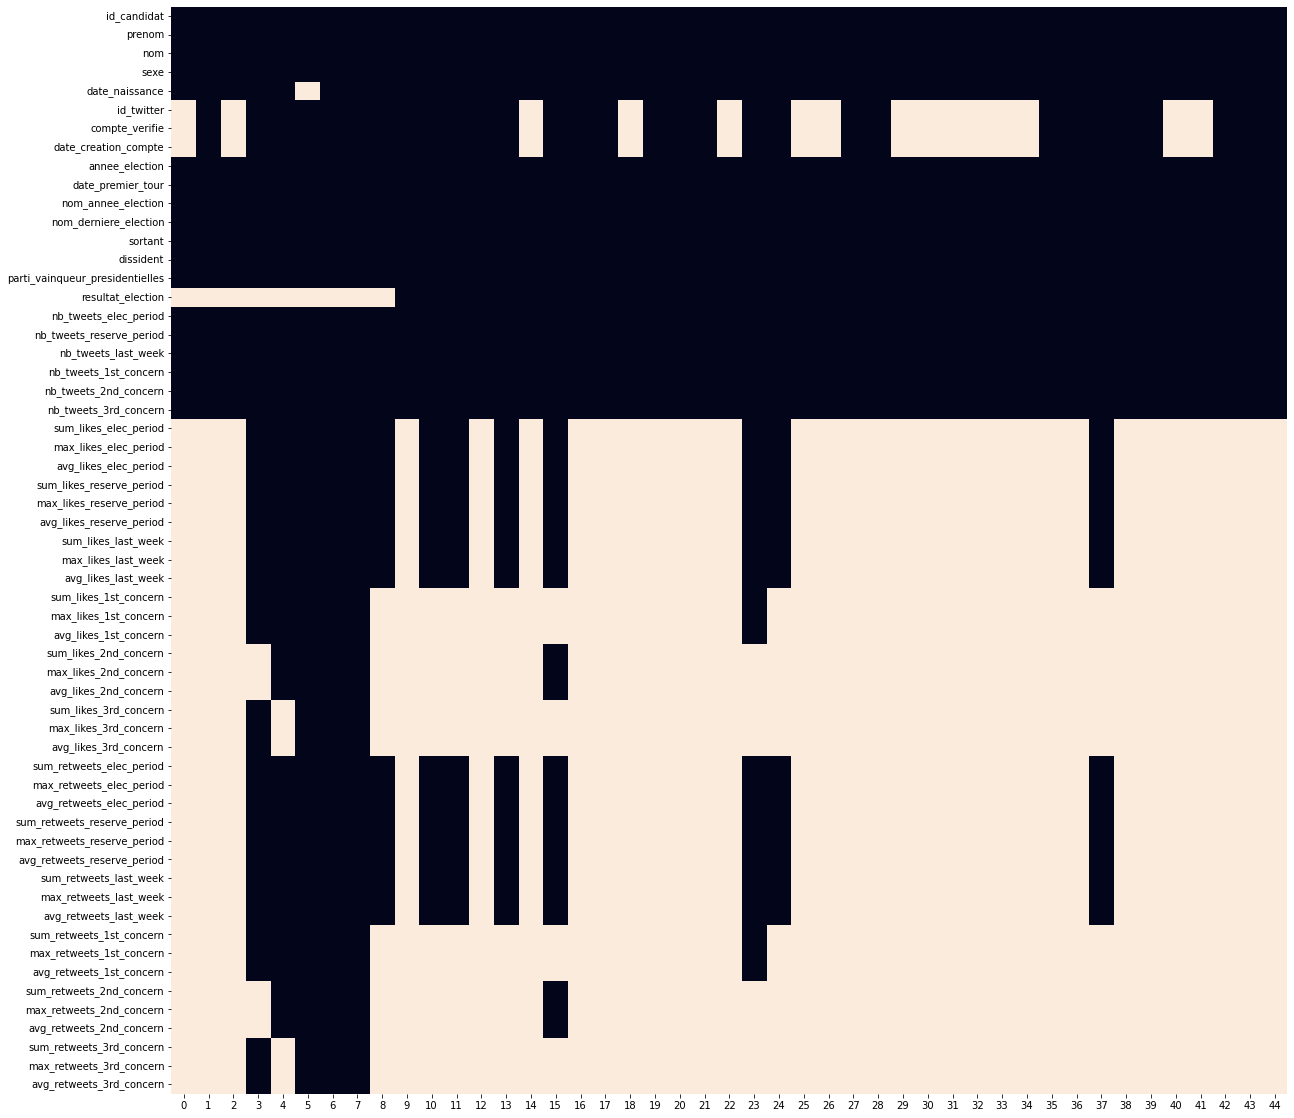

In [90]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull().sort_index().T, cbar=False)
plt.show()

## Préparation du Dataset

### Suppression des observations sans valeur cible

In [91]:
length_before = len(df)
df.dropna(axis=0, how="any", subset="resultat_election", inplace=True)
df.reset_index(drop=True, inplace=True)
length_after = len(df)
n_dropped = length_before - length_after
print(f"Number of rows dropped: {n_dropped}")

Number of rows dropped: 9


### Suppression des candidats sans compte Twitter

In [92]:
length_before = len(df)
df.dropna(axis=0, how="any", subset="id_twitter", inplace=True)
df.reset_index(drop=True, inplace=True)
length_after = len(df)
n_dropped = length_before - length_after
print(f"Number of rows dropped: {n_dropped}")

Number of rows dropped: 13


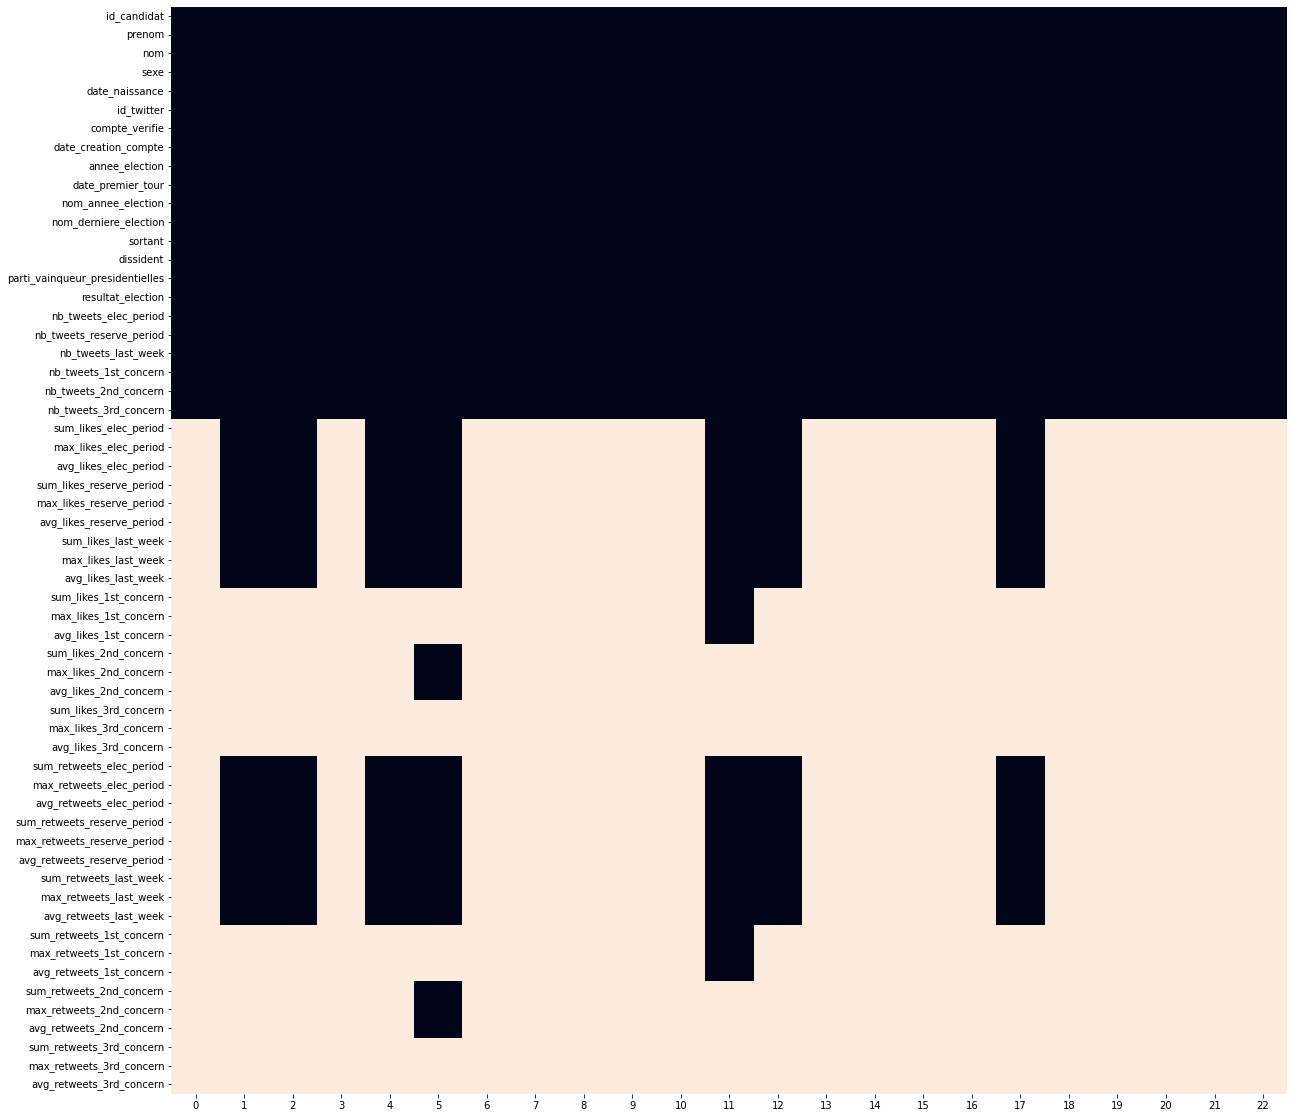

In [93]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull().sort_index().T, cbar=False)
plt.show()

### Suppression des variables non pertinentes

# Préparation du Dataset pour la Modélisation

### Séparation de la colonne cible

In [94]:
y = df["resultat_election"]
X = df[df.columns.difference(["resultat_election"])]

### Constitution des jeux d'entraînement et de test

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Number of samples for training: {X_train.shape[0]}")
print(f"Number of samples for testing: {X_test.shape[0]}")

Number of samples for training: 18
Number of samples for testing: 5


### Traitement des valeurs manquantes

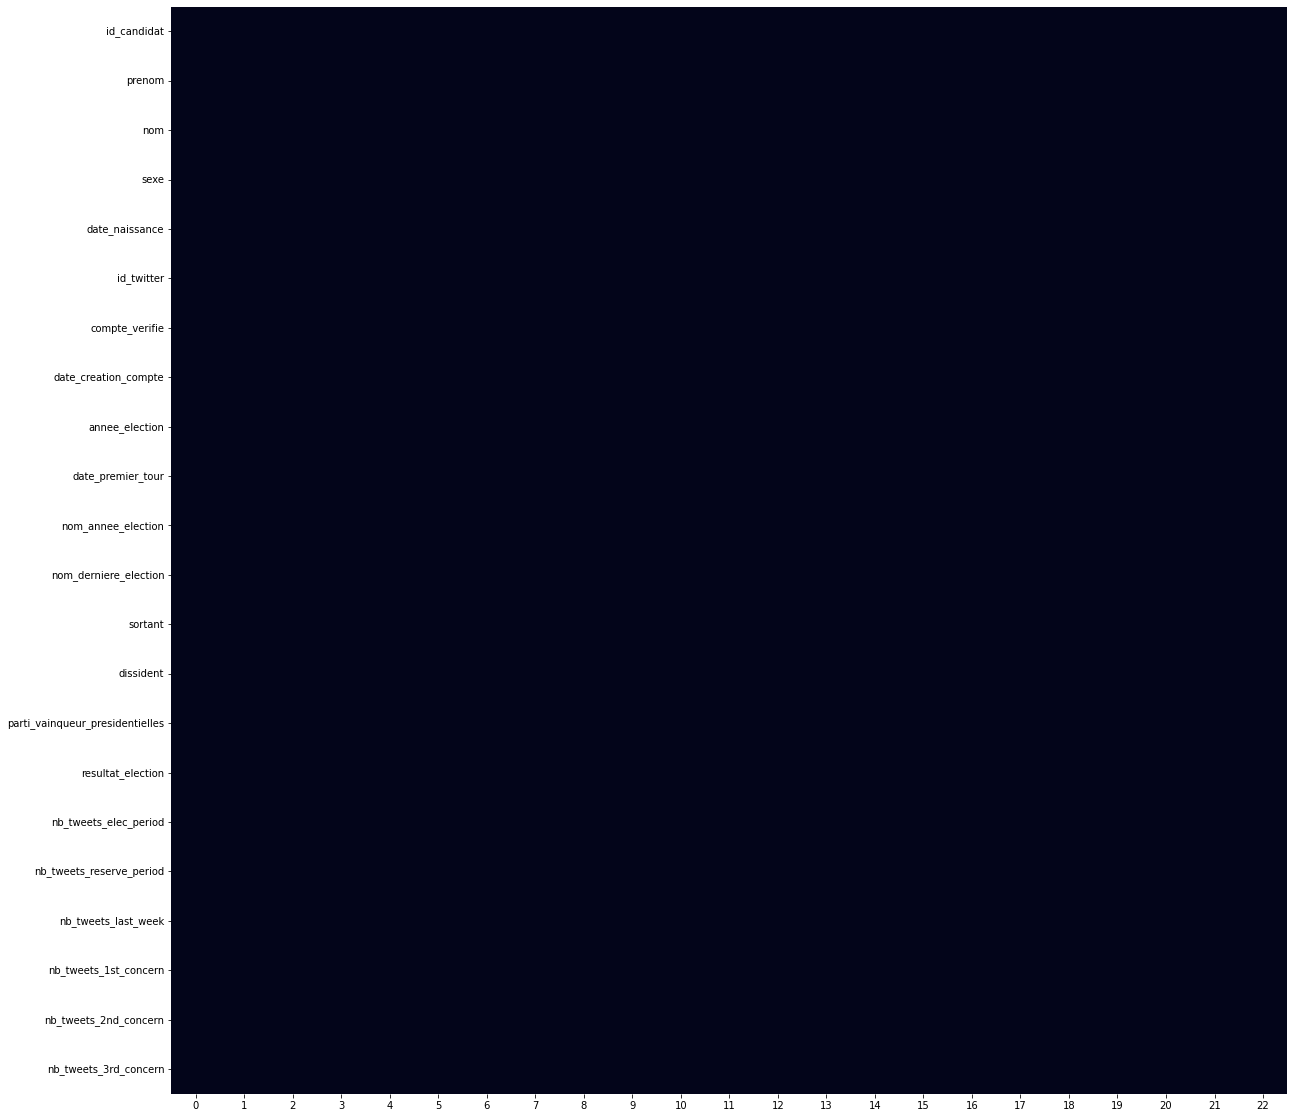

In [97]:
df.dropna(axis=1, how="any", inplace=True)
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull().sort_index().T, cbar=False)
plt.show()

### Feature engineering

### Création du preprocessor

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id_candidat                      23 non-null     int64         
 1   prenom                           23 non-null     object        
 2   nom                              23 non-null     object        
 3   sexe                             23 non-null     object        
 4   date_naissance                   23 non-null     datetime64[ns]
 5   id_twitter                       23 non-null     float64       
 6   compte_verifie                   23 non-null     object        
 7   date_creation_compte             23 non-null     datetime64[ns]
 8   annee_election                   23 non-null     int64         
 9   date_premier_tour                23 non-null     datetime64[ns]
 10  nom_annee_election               23 non-null     object        


In [ ]:
# Opérations de transformation pour les variables catégorielles
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Variables catégorielles
categorical_features = X_train.select_dtypes(["category"]).columns

# Instantiation du pré-processeur
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="passthrough"
)

## Modélisation

### Définition des métriques

In [55]:
def classification_metrics(y, y_pred):
    return pd.DataFrame(
        {
            "accuracy_score": metrics.accuracy_score(y_true=y, y_pred=y_pred),
            "f1_score": metrics.f1_score(y_true=y, y_pred=y_pred),
            "precision_score": metrics.precision_score(
                y_true=y, y_pred=y_pred),
            "recall_score": metrics.recall_score(y_true=y, y_pred=y_pred)
        },
        index=[0])

### Decision Tree

In [62]:
dt_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier()),
])

NameError: name 'preprocessor' is not defined

In [ ]:
dt_params_grid = {
    "model__splitter": ["best", "random"],
    "model__max_depth": [2, 3, 5, 10, 15, 20, 30],
    "model__min_samples_split": [5, 10, 20, 30, 40],
    "model__min_samples_leaf": [1, 2, 5, 10],
    "model__max_features": ["auto", "sqrt", "log2"],
    "model__class_weight": ["balanced"]
}

pp.pprint(dt_params_grid)

total_conf = 1
for _, value in dt_params_grid.items():
    if isinstance(value, list):
        total_conf *= len(value)

print("\n")
print(f"Nombre de configurations à tester : {total_conf}")

In [ ]:
dt_grid_search = GridSearchCV(
                                    estimator=dt_pipeline, 
                                    param_grid=dt_params_grid,
                                    cv=5,
                                    scoring="recall",
                                    verbose=1,
                                    n_jobs=6
                                )

dt_grid_search.fit(X_train, y_train)
print(f"Best score: {round(dt_grid_search.best_score_, 2)}")
pp.pprint(dt_grid_search.best_params_)